In [182]:
import pandas as pd
import numpy as np
import seaborn as sns

from pandas.api.types import CategoricalDtype

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

cat_type = CategoricalDtype(categories=order, ordered=True)



In [183]:
# Source: https://survey.stackoverflow.co/?utm_source=chatgpt.com
df_raw25 = pd.read_csv('/Users/guywinfield/PycharmProjects/Data/stack-overflow-developer-survey-2025/survey_results_public.csv')
df_raw24 = pd.read_csv('/Users/guywinfield/PycharmProjects/Data/stack-overflow-developer-survey-2024/survey_results_public.csv')


In [215]:
df25 = df_raw25.copy()
df24 = df_raw24.copy()

# Data Preparation

In [216]:
df25 = df25[df25['Country'] == 'United Kingdom of Great Britain and Northern Ireland']
df24 = df24[df24['Country'] == 'United Kingdom of Great Britain and Northern Ireland']

In [274]:
mapping = {
    "Very unfavorable": -2,
    "Unfavorable": -1,
    "Unsure": 0,
    "Indifferent": 0,
    "Favorable": 1,
    "Very favorable": 2
}

df25['AISent_int'] = df25['AISent'].map(mapping)
df25['Version'] = 2025

df24['AISent_int'] = df24['AISent'].map(mapping)
df24['Version'] = 2024

df25['AISent'] = df25['AISent'].astype(cat_type)
df24['AISent'] = df24['AISent'].astype(cat_type)

In [246]:
respondent_info_cols = [
    'ResponseId',
    'MainBranch',
    'Age',
    'EdLevel',
    'Employment',
    'EmploymentAddl',
    'WorkExp',
    'YearsCode',
    'DevType',
    'OrgSize',
    'ICorPM',
    'Industry',
    'EdLevel',
    'Employment',
    'LearnCodeChoose',
    'LearnCodeAI',
    'Country',
    'ConvertedCompYearly',
    'JobSat',
    'Version',
]

ratings_cols = [
    'TechEndorseIntro',
    'TechEndorse_1',
    'TechEndorse_2',
    'TechEndorse_3',
    'TechEndorse_4',
    'TechEndorse_5',
    'TechEndorse_6',
    'TechEndorse_7',
    'TechEndorse_8',
    'TechEndorse_9',
    'TechEndorse_13',

    'TechOppose_1',
    'TechOppose_2',
    'TechOppose_3',
    'TechOppose_5',
    'TechOppose_7',
    'TechOppose_9',
    'TechOppose_11',
    'TechOppose_13',
    'TechOppose_15',

    'JobSatPoints_1',
    'JobSatPoints_4',
    'JobSatPoints_5',
    'JobSatPoints_6',
    'JobSatPoints_7',
    'JobSatPoints_8',
    'JobSatPoints_9',
    'JobSatPoints_10',
    'JobSatPoints_11',
    'JobSatPoints_13',
    'JobSatPoints_14',
    'JobSatPoints_15',
    'JobSatPoints_16'
]

ai_cols = [
    'AISent',
    'AISent_int',
    'AISelect',
    'AIThreat',
    'AIFrustration',
    'AIModelsChoice'
]

all_cols = respondent_info_cols + ai_cols + ratings_cols

# 2025 EDA

In [247]:
df25 = df25[all_cols]

In [248]:
print(len(df25))
df25.isnull().sum()/len(df25)

2038


ResponseId             0.000000
MainBranch             0.000000
Age                    0.000000
EdLevel                0.001963
Employment             0.000000
EmploymentAddl         0.064279
WorkExp                0.046614
YearsCode              0.008342
DevType                0.000000
OrgSize                0.190383
ICorPM                 0.201668
Industry               0.113346
EdLevel                0.001963
Employment             0.000000
LearnCodeChoose        0.001472
LearnCodeAI            0.002944
Country                0.000000
ConvertedCompYearly    0.271344
JobSat                 0.253680
Version                0.000000
AISent                 0.035329
AISent_int             0.035329
AISelect               0.036310
AIThreat               0.039745
AIFrustration          0.086359
AIModelsChoice         0.117763
TechEndorseIntro       0.029931
TechEndorse_1          0.058881
TechEndorse_2          0.058881
TechEndorse_3          0.058881
TechEndorse_4          0.058881
TechEndo

In [249]:
len(df25.dropna())

843

In [250]:
df25.head(2)

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,YearsCode,DevType,OrgSize,ICorPM,Industry,EdLevel,Employment,LearnCodeChoose,LearnCodeAI,Country,ConvertedCompYearly,JobSat,Version,AISent,AISent_int,AISelect,AIThreat,AIFrustration,AIModelsChoice,TechEndorseIntro,TechEndorse_1,TechEndorse_2,TechEndorse_3,TechEndorse_4,TechEndorse_5,TechEndorse_6,TechEndorse_7,TechEndorse_8,TechEndorse_9,TechEndorse_13,TechOppose_1,TechOppose_2,TechOppose_3,TechOppose_5,TechOppose_7,TechOppose_9,TechOppose_11,TechOppose_13,TechOppose_15,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSatPoints_13,JobSatPoints_14,JobSatPoints_15,JobSatPoints_16
25,26,I am a developer by profession,55-64 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,37.0,41.0,"Developer, full-stack",NaN,NaN,Software Development,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...","Yes, I am not new to coding but am learning ne...","Yes, I learned how to use AI-enabled tools for...",United Kingdom of Great Britain and Northern I...,108913.0,8.0,2025,Favorable,1.0,"Yes, I use AI tools daily",No,"AI solutions that are almost right, but not quite",Yes,Personal Project,7.0,5.0,4.0,2.0,1.0,8.0,3.0,6.0,13.0,14.0,11.0,2.0,8.0,5.0,6.0,4.0,1.0,3.0,15.0,2.0,10.0,11.0,4.0,12.0,13.0,6.0,3.0,5.0,7.0,14.0,15.0,8.0
38,39,I am a developer by profession,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,None of the above,25.0,25.0,"Developer, full-stack",Less than 20 employees,Individual contributor,Software Development,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"No, I am not new to coding and did not learn n...","Yes, I learned how to use AI-enabled tools for...",United Kingdom of Great Britain and Northern I...,91215.0,6.0,2025,Favorable,1.0,"Yes, I use AI tools daily",No,"AI solutions that are almost right, but not quite",Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,10.0,11.0,12.0,13.0,5.0,8.0,6.0,1.0,14.0,4.0,15.0,2.0


In [251]:
df25['ICorPM'].value_counts()



ICorPM
Individual contributor    1372
People manager             255
Name: count, dtype: int64

In [252]:
df25['DevType'].value_counts()

DevType
Developer, full-stack                            596
Developer, back-end                              318
Architect, software or solutions                 120
Other (please specify):                           97
Developer, desktop or enterprise applications     92
Student                                           82
Developer, embedded applications or devices       68
Engineering manager                               66
Developer, front-end                              66
Academic researcher                               63
Retired                                           52
Developer, mobile                                 46
DevOps engineer or professional                   40
Data engineer                                     32
Data scientist                                    31
Senior executive (C-suite, VP, etc.)              31
AI/ML engineer                                    31
Founder, technology or otherwise                  25
Developer, game or graphics           

<Axes: xlabel='WorkExp', ylabel='Count'>

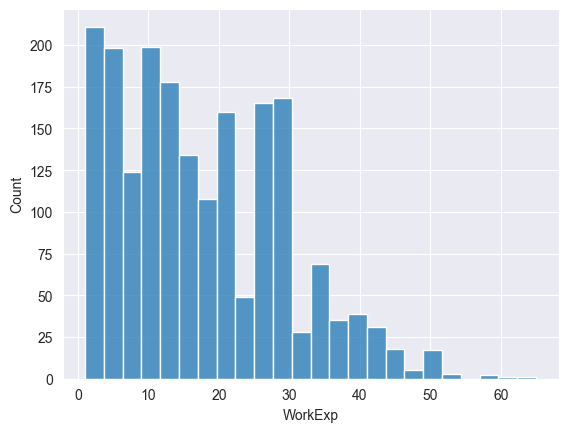

In [253]:
sns.histplot(df25['WorkExp'])

<Axes: xlabel='AISent', ylabel='JobSat'>

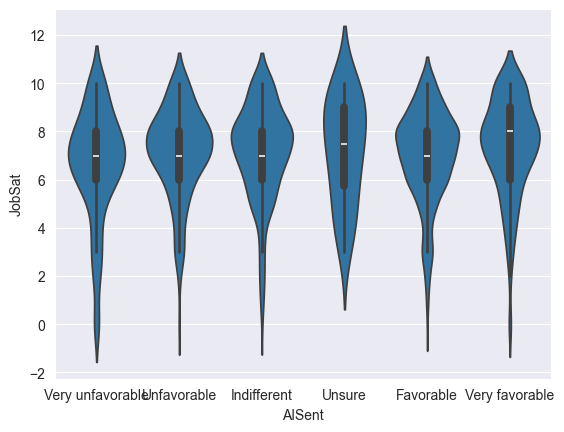

In [254]:
df_vplot = df25[['AISent','JobSat']].dropna()

order = [
    "Very unfavorable",
    "Unfavorable",
    "Indifferent",
    "Unsure",
    "Favorable",
    "Very favorable"
]

sns.violinplot(data=df_vplot, x='AISent', y='JobSat',order=order)

In [255]:
df25.head()

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,YearsCode,DevType,OrgSize,ICorPM,Industry,EdLevel,Employment,LearnCodeChoose,LearnCodeAI,Country,ConvertedCompYearly,JobSat,Version,AISent,AISent_int,AISelect,AIThreat,AIFrustration,AIModelsChoice,TechEndorseIntro,TechEndorse_1,TechEndorse_2,TechEndorse_3,TechEndorse_4,TechEndorse_5,TechEndorse_6,TechEndorse_7,TechEndorse_8,TechEndorse_9,TechEndorse_13,TechOppose_1,TechOppose_2,TechOppose_3,TechOppose_5,TechOppose_7,TechOppose_9,TechOppose_11,TechOppose_13,TechOppose_15,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSatPoints_13,JobSatPoints_14,JobSatPoints_15,JobSatPoints_16
25,26,I am a developer by profession,55-64 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,37.0,41.0,"Developer, full-stack",NaN,NaN,Software Development,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...","Yes, I am not new to coding but am learning ne...","Yes, I learned how to use AI-enabled tools for...",United Kingdom of Great Britain and Northern I...,108913.0,8.0,2025,Favorable,1.0,"Yes, I use AI tools daily",No,"AI solutions that are almost right, but not quite",Yes,Personal Project,7.0,5.0,4.0,2.0,1.0,8.0,3.0,6.0,13.0,14.0,11.0,2.0,8.0,5.0,6.0,4.0,1.0,3.0,15.0,2.0,10.0,11.0,4.0,12.0,13.0,6.0,3.0,5.0,7.0,14.0,15.0,8.0
38,39,I am a developer by profession,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,None of the above,25.0,25.0,"Developer, full-stack",Less than 20 employees,Individual contributor,Software Development,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"No, I am not new to coding and did not learn n...","Yes, I learned how to use AI-enabled tools for...",United Kingdom of Great Britain and Northern I...,91215.0,6.0,2025,Favorable,1.0,"Yes, I use AI tools daily",No,"AI solutions that are almost right, but not quite",Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,10.0,11.0,12.0,13.0,5.0,8.0,6.0,1.0,14.0,4.0,15.0,2.0
48,49,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,15.0,21.0,"Senior executive (C-suite, VP, etc.)",20 to 99 employees,People manager,Fintech,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,"Yes, I am not new to coding but am learning ne...","Yes, I learned how to use AI-enabled tools for...",United Kingdom of Great Britain and Northern I...,142949.0,7.0,2025,Unfavorable,-1.0,"Yes, I use AI tools monthly or infrequently",I'm not sure,"AI solutions that are almost right, but not qu...",Yes,Work,13.0,3.0,6.0,12.0,1.0,10.0,9.0,4.0,2.0,14.0,14.0,6.0,11.0,10.0,1.0,2.0,5.0,9.0,15.0,5.0,13.0,12.0,8.0,11.0,9.0,10.0,14.0,1.0,3.0,2.0,15.0,4.0
59,60,I am a developer by profession,45-54 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,"Caring for dependents (children, elderly, etc.)",20.0,25.0,"Developer, full-stack",20 to 99 employees,Individual contributor,Software Development,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,"Yes, I am not new to coding but am learning ne...","Yes, I learned how to use AI-enabled tools for...",United Kingdom of Great Britain and Northern I...,151117.0,8.0,2025,Favorable,1.0,"Yes, I use AI tools daily",I'm not sure,"AI solutions that are almost right, but not quite",Yes,Work,9.0,1.0,11.0,8.0,2.0,6.0,10.0,13.0,3.0,14.0,12.0,2.0,3.0,5.0,1.0,7.0,14.0,11.0,15.0,1.0,4.0,5.0,6.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,7.0
73,74,I am a developer by profession,55-64 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc....",36.0,45.0,Engineering manager,Less than 20 employees,People manager,Fintech,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Yes, I am not new to coding 

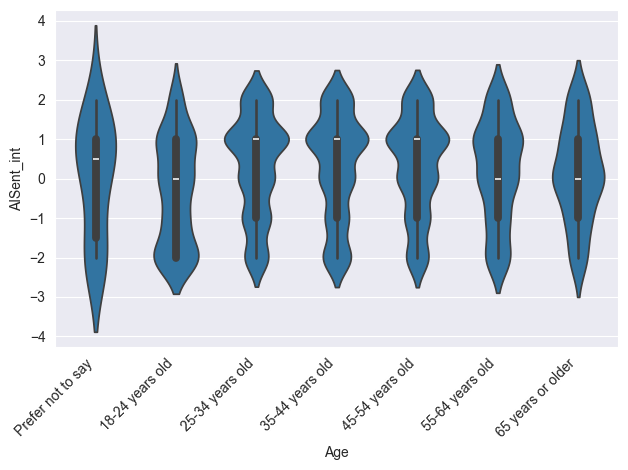

In [256]:
import matplotlib.pyplot as plt

df_vplot = df25[['AISent_int','Age']].dropna()

order = [
    "Prefer not to say",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older",
]

sns.violinplot(data=df_vplot, x='Age', y='AISent_int', order=order)

plt.xticks(rotation=45, ha='right')  # rotate labels 45° and align right
plt.tight_layout()                   # adjust layout so labels fit
plt.show()


<Axes: xlabel='JobSat', ylabel='Density'>

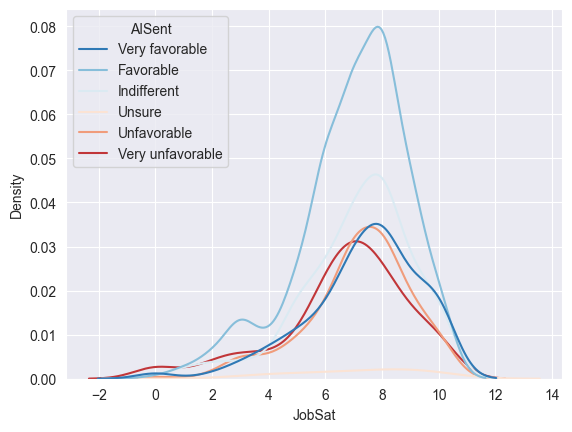

In [257]:
from pandas.api.types import CategoricalDtype

order = [
    "Very favorable",
    "Favorable",
    "Indifferent",
    "Unsure",
    "Unfavorable",
    "Very unfavorable"
]

palette = sns.color_palette("RdBu_r", n_colors=len(order))

sns.kdeplot(
    data=df25,
    x='JobSat',
    hue='AISent',
    hue_order=order,      # ensures legend order
    palette=palette       # ensures blue → red
)

<Axes: xlabel='WorkExp', ylabel='Density'>

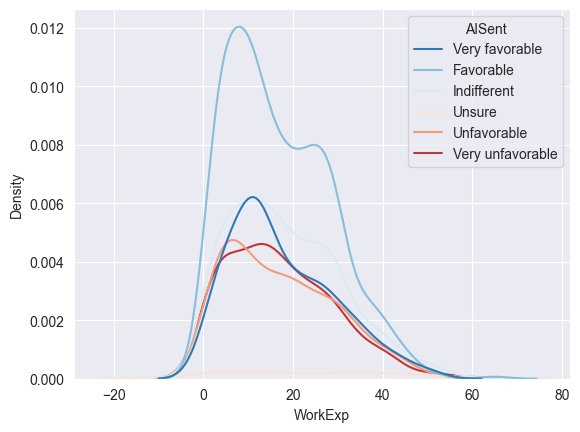

In [258]:
sns.kdeplot(
    data=df25,
    x='WorkExp',
    hue='AISent',
    hue_order=order,      # ensures legend order
    palette=palette       # ensures blue → red
)

/var/folders/kn/24kjgmss2yzfjngp_zf6x8vr0000gn/T/ipykernel_2640/2128669959.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


<Axes: xlabel='JobSat', ylabel='AISent_int'>

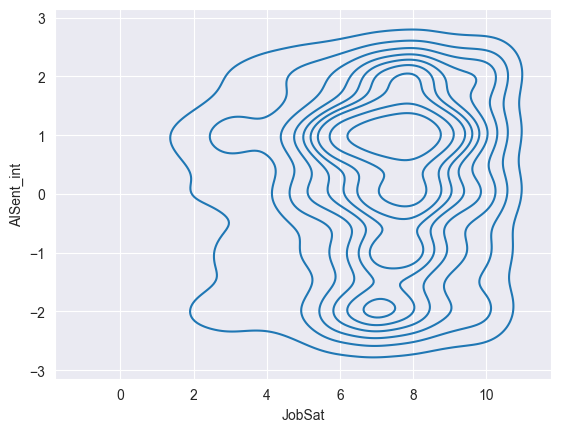

In [259]:
sns.kdeplot(
    data=df25,
    x='JobSat',
    y='AISent_int',
    hue_order=order,      # ensures legend order
    palette=palette       # ensures blue → red
)

(array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 [Text(-2.5, 0, '−2.5'),
  Text(-2.0, 0, '−2.0'),
  Text(-1.5, 0, '−1.5'),
  Text(-1.0, 0, '−1.0'),
  Text(-0.5, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5')])

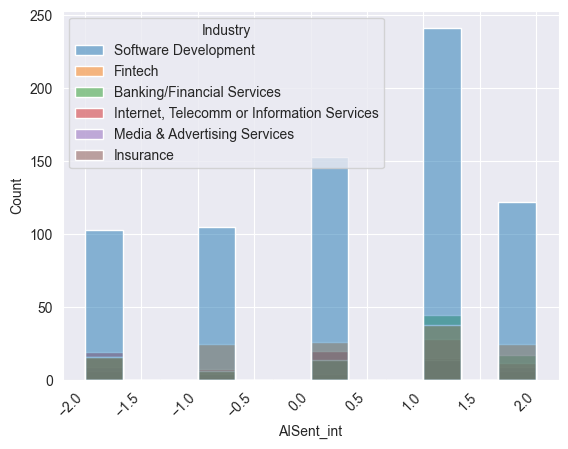

In [260]:
industry_cols = [
    'Software Development',
    'Fintech',
    'Banking/Financial Services',
    'Internet, Telecomm or Information Services',
    'Media & Advertising Services',
    'Insurance',
]

df_vplot = df25[df25['Industry'].isin(industry_cols)]

sns.histplot(data=df_vplot, x='AISent_int', hue='Industry', hue_order=industry_cols)

#sns.violinplot(data=df_vplot, x='Industry', y='AISent_int', order=order)

plt.xticks(rotation=45, ha='right')  # rotate labels 45° and align right
#plt.tight_layout()                   # adjust layout so labels fit
#plt.show()


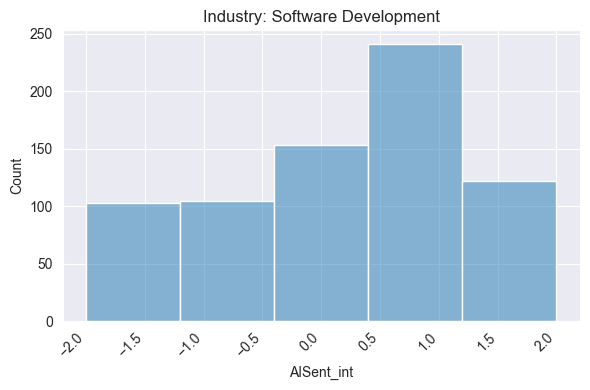

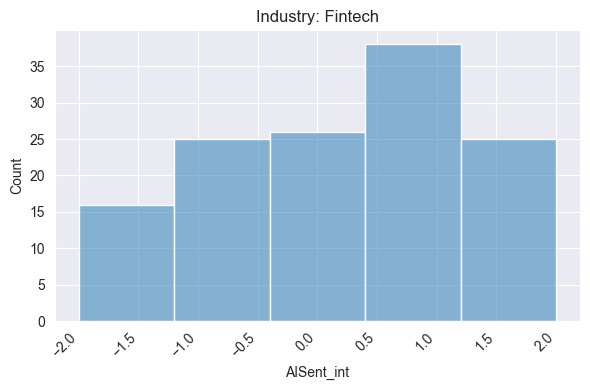

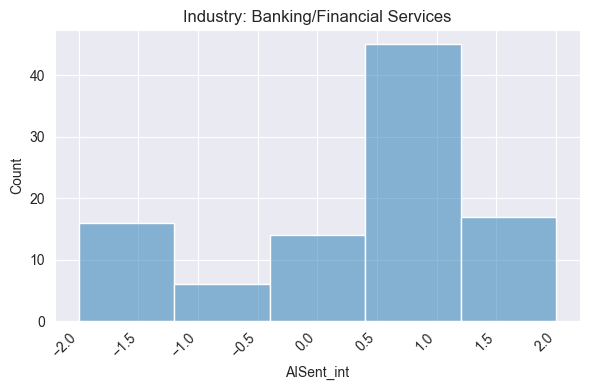

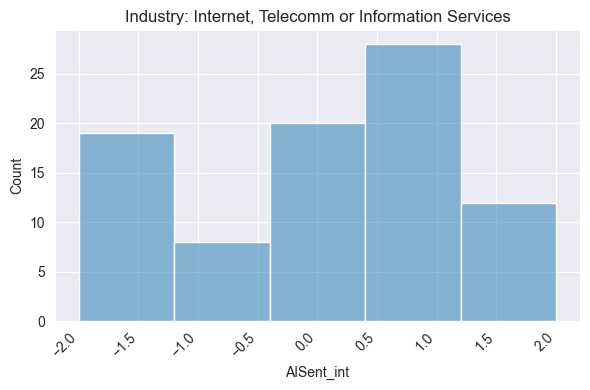

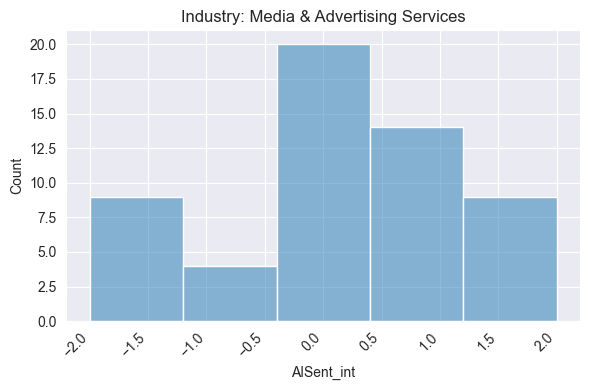

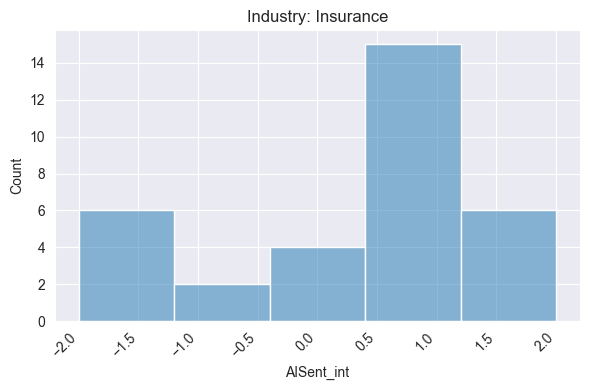

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in industry_cols:
    df_vplot = df25[df25['Industry'] == i]

    plt.figure(figsize=(6,4))   # new figure for each i
    sns.histplot(data=df_vplot, x='AISent_int', hue='Industry',bins=5)

    plt.title(f"Industry: {i}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend([], [], frameon=False)   # hide legend
    plt.show()


In [262]:
df25['Industry'].value_counts()

Industry
Software Development                          748
Other:                                        180
Fintech                                       133
Banking/Financial Services                    103
Internet, Telecomm or Information Services     92
Higher Education                               82
Healthcare                                     65
Manufacturing                                  63
Media & Advertising Services                   61
Retail and Consumer Services                   57
Computer Systems Design and Services           50
Energy                                         50
Government                                     49
Transportation, or Supply Chain                39
Insurance                                      35
Name: count, dtype: int64

In [263]:
df25['WorkExp'].dtypes

dtype('float64')

# EDA 2024

In [264]:
df24 = df24[all_cols]

KeyError: "['EmploymentAddl', 'LearnCodeChoose', 'LearnCodeAI', 'AIFrustration', 'AIModelsChoice', 'TechEndorseIntro', 'TechEndorse_1', 'TechEndorse_2', 'TechEndorse_3', 'TechEndorse_4', 'TechEndorse_5', 'TechEndorse_6', 'TechEndorse_7', 'TechEndorse_8', 'TechEndorse_9', 'TechEndorse_13', 'TechOppose_1', 'TechOppose_2', 'TechOppose_3', 'TechOppose_5', 'TechOppose_7', 'TechOppose_9', 'TechOppose_11', 'TechOppose_13', 'TechOppose_15', 'JobSatPoints_13', 'JobSatPoints_14', 'JobSatPoints_15', 'JobSatPoints_16'] not in index"

In [265]:
df24.dtypes

ResponseId                          int64
MainBranch                         object
Age                                object
Employment                         object
RemoteWork                         object
Check                              object
CodingActivities                   object
EdLevel                            object
LearnCode                          object
LearnCodeOnline                    object
TechDoc                            object
YearsCode                          object
YearsCodePro                       object
DevType                            object
OrgSize                            object
PurchaseInfluence                  object
BuyNewTool                         object
BuildvsBuy                         object
TechEndorse                        object
Country                            object
Currency                           object
CompTotal                         float64
LanguageHaveWorkedWith             object
LanguageWantToWorkWith            

# 2024 vs 2025

In [312]:
df25 = df25.loc[:, ~df25.columns.duplicated()]
df24 = df24.loc[:, ~df24.columns.duplicated()]

common_cols = df25.columns.intersection(df24.columns)

df_union = pd.concat([df25[common_cols], df24[common_cols]], ignore_index=True)

In [313]:
df24['AISelect'].value_counts()

AISelect
Yes                        1627
No, and I don't plan to    1164
No, but I plan to soon      418
Name: count, dtype: int64

In [314]:
mapping = {
    "Yes": "Yes",
    "No, and I don't plan to": "No",
    "Yes, I use AI tools daily": "Yes",
    "No, but I plan to soon": "No",
    "Yes, I use AI tools weekly ": "Yes",
    "Yes, I use AI tools monthly or infrequently": "Yes",
}

df_union['AISelect_mapped'] = df_union['AISelect'].map(mapping)

In [381]:
mapping = {
    "No": -1,
    "I'm not sure": 0,
    "Yes": 1,
}

df_union['AIThreat_int'] = df_union['AIThreat'].map(mapping)

In [383]:
df_union['AIThreat_int'].value_counts()

AIThreat_int
-1.0    2776
 0.0     718
 1.0     496
Name: count, dtype: int64

In [315]:
df_union.head()

,ResponseId,MainBranch,Age,EdLevel,Employment,WorkExp,YearsCode,DevType,OrgSize,ICorPM,Industry,Country,ConvertedCompYearly,JobSat,Version,AISent,AISent_int,AISelect,AIThreat,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,AISelect_mapped
0,26,I am a developer by profession,55-64 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",37.0,41.0,"Developer, full-stack",NaN,NaN,Software Development,United Kingdom of Great Britain and Northern I...,108913.0,8.0,2025,Favorable,1.0,"Yes, I use AI tools daily",No,2.0,10.0,11.0,4.0,12.0,13.0,6.0,3.0,5.0,Yes
1,39,I am a developer by profession,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,25.0,25.0,"Developer, full-stack",Less than 20 employees,Individual contributor,Software Development,United Kingdom of Great Britain and Northern I...,91215.0,6.0,2025,Favorable,1.0,"Yes, I use AI tools daily",No,7.0,10.0,11.0,12.0,13.0,5.0,8.0,6.0,1.0,Yes
2,49,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,15.0,21.0,"Senior executive (C-suite, VP, etc.)",20 to 99 employees,People manager,Fintech,United Kingdom of Great Britain and Northern I...,142949.0,7.0,2025,Unfavorable,-1.0,"Yes, I use AI tools monthly or infrequently",I'm not sure,5.0,13.0,12.0,8.0,11.0,9.0,10.0,14.0,1.0,Yes
3,60,I am a developer by profession,45-54 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,20.0,25.0,"Developer, full-stack",20 to 99 employees,Individual contributor,Software Development,United Kingdom of Great Britain and Northern I...,151117.0,8.0,2025,Favorable,1.0,"Yes, I use AI tools daily",I'm not sure,1.0,4.0,5.0,6.0,8.0,9.0,10.0,11.0,12.0,Yes
4,74,I am a developer by profession,55-64 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,36.0,45.0,Engineering manager,Less than 20 employees,People manager,Fintech,United Kingdom of Great Britain and Northern I...,115720.0,8.0,2025,Very favorable,2.0,"Yes, I use AI tools daily",No,6.0,15.0,8.0,9.0,3.0,2.0,10.0,4.0,14.0,Yes


In [316]:
df_union.dtypes

ResponseId                int64
MainBranch               object
Age                      object
EdLevel                  object
Employment               object
WorkExp                 float64
YearsCode                object
DevType                  object
OrgSize                  object
ICorPM                   object
Industry                 object
Country                  object
ConvertedCompYearly     float64
JobSat                  float64
Version                   int64
AISent                 category
AISent_int              float64
AISelect                 object
AIThreat                 object
JobSatPoints_1          float64
JobSatPoints_4          float64
JobSatPoints_5          float64
JobSatPoints_6          float64
JobSatPoints_7          float64
JobSatPoints_8          float64
JobSatPoints_9          float64
JobSatPoints_10         float64
JobSatPoints_11         float64
AISelect_mapped          object
dtype: object

<Axes: xlabel='AISent_int', ylabel='Count'>

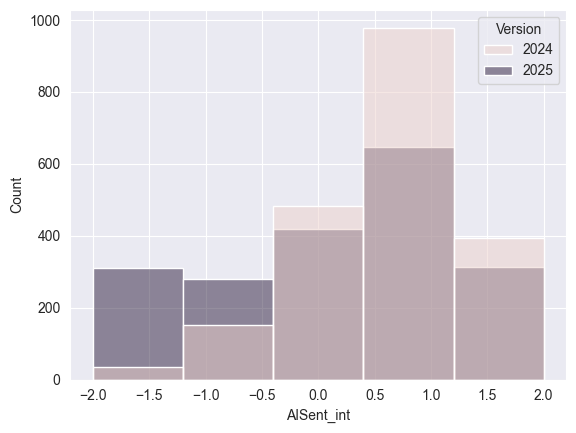

In [317]:
sns.histplot(data=df_union, x='AISent_int', hue='Version', bins=5)

<Axes: xlabel='AISent_int', ylabel='Density'>

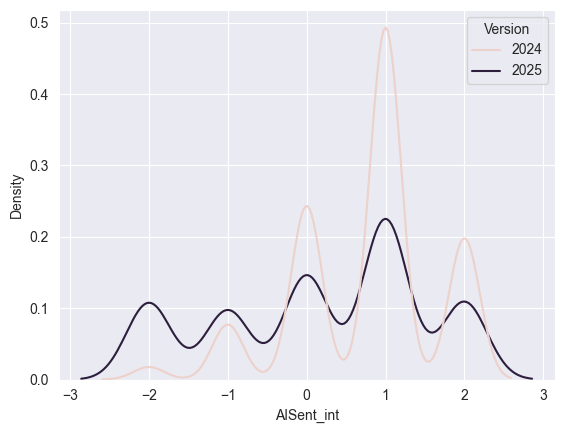

In [318]:
sns.kdeplot(data=df_union, x='AISent_int', hue='Version')

<Axes: xlabel='JobSat', ylabel='Density'>

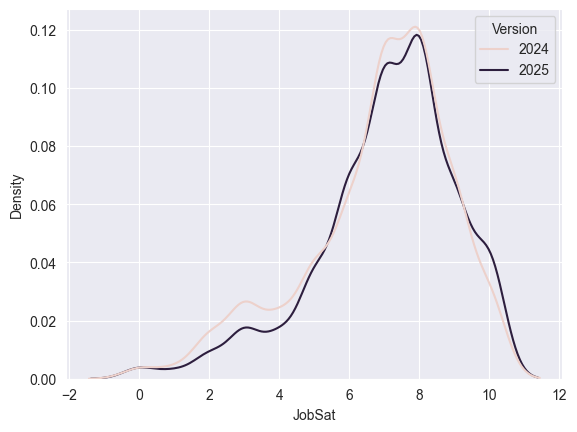

In [319]:
sns.kdeplot(data=df_union, x='JobSat', hue='Version')

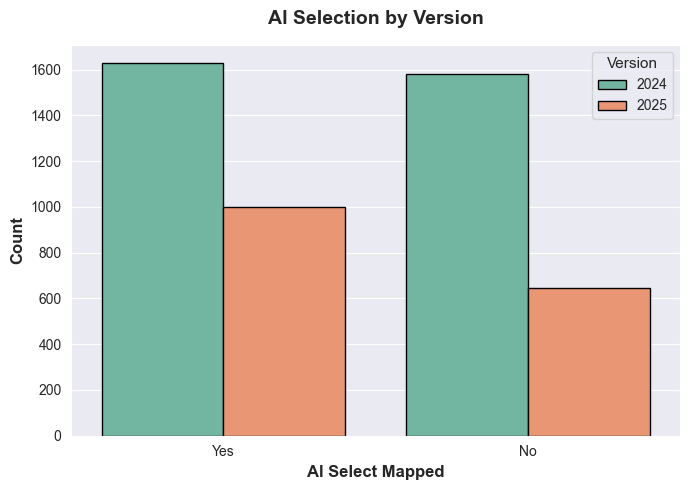

In [324]:
plt.figure(figsize=(7,5))

ax = sns.countplot(
    data=df_union,
    x='AISelect_mapped',
    hue='Version',
    palette='Set2',
    edgecolor='black'
)

ax.set_xlabel("AI Select Mapped", fontsize=12, fontweight='bold')
ax.set_ylabel("Count", fontsize=12, fontweight='bold')
ax.set_title("AI Selection by Version", fontsize=14, fontweight='bold', pad=15)

ax.legend(title="Version", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()


/var/folders/kn/24kjgmss2yzfjngp_zf6x8vr0000gn/T/ipykernel_2640/3797505536.py:22: UserWarning:

The palette list has more values (10) than needed (2), which may not be intended.



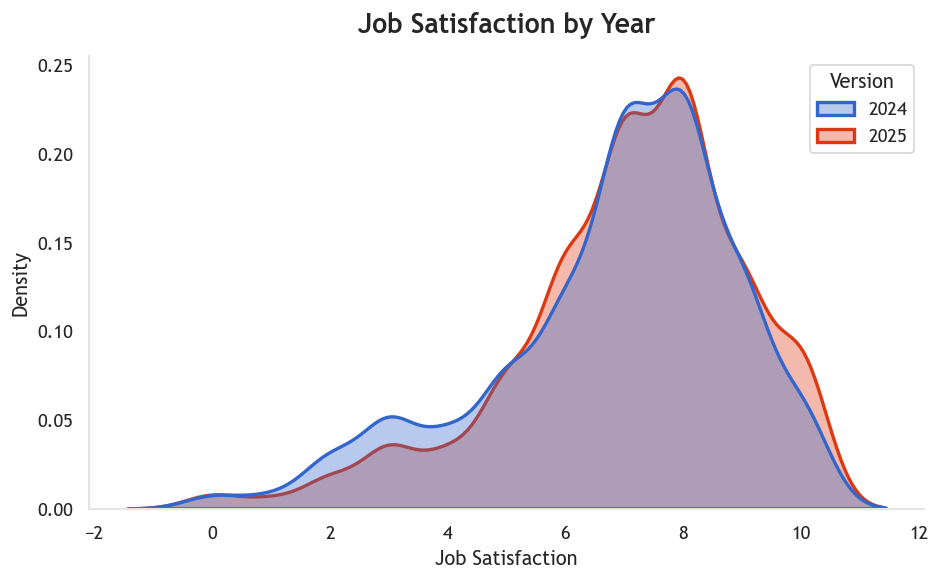

In [340]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Style to mirror Plotly "simple_white" ---
sns.set_theme(style="white", rc={
    "axes.edgecolor": "#E5E5E5",
    "grid.color": "#ffffff",
    "axes.labelsize": 12,
    "axes.titlesize": 16,
    "font.family": "Trebuchet MS"  # will fall back if not installed
})

# Google/Plotly qualitative G10 palette
G10 = [
    "#3366CC","#DC3912","#FF9900","#109618","#990099",
    "#3B3EAC","#0099C6","#DD4477","#66AA00","#B82E2E"
]

fig, ax = plt.subplots(figsize=(8, 5), dpi=120)

sns.kdeplot(
    data=df_union,
    x="JobSat",
    hue="Version",
    fill=True,
    common_norm=False,
    alpha=0.35,
    linewidth=2,
    palette=G10
)

# Labels & title (Plotly-like)
ax.set_title("Job Satisfaction by Year", pad=14, fontweight="bold")
ax.set_xlabel("Job Satisfaction")
ax.set_ylabel("Density")

# Simple-white look: light grid, no top/right spines
ax.grid(True, alpha=0.25)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)




plt.tight_layout()
plt.show()


/var/folders/kn/24kjgmss2yzfjngp_zf6x8vr0000gn/T/ipykernel_2640/1751533779.py:24: UserWarning:

The palette list has more values (10) than needed (2), which may not be intended.



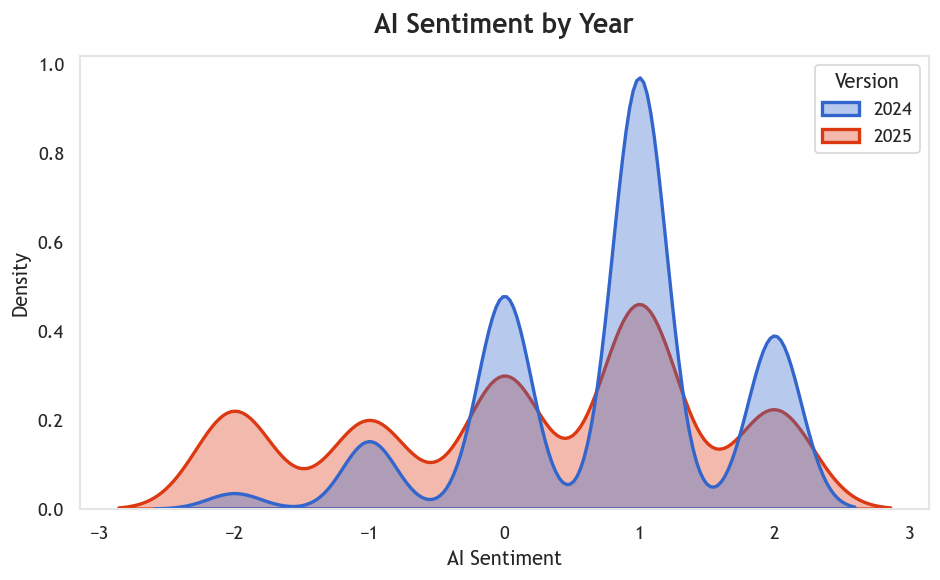

In [352]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Style to mirror Plotly "simple_white" ---
sns.set_theme(style="white", rc={
    "axes.edgecolor": "#E5E5E5",
    "grid.color": "#ffffff",
    "axes.labelsize": 12,
    "axes.titlesize": 16,
    "font.family": "Trebuchet MS"  # will fall back if not installed
})

# Google/Plotly qualitative G10 palette
G10 = [
    "#3366CC","#DC3912","#FF9900","#109618","#990099",
    "#3B3EAC","#0099C6","#DD4477","#66AA00","#B82E2E"
]

#8da9fe

fig, ax = plt.subplots(figsize=(8, 5), dpi=120)

sns.kdeplot(
    data=df_union,
    x="AISent_int",
    hue="Version",
    common_norm=False,
    alpha=0.35,
    linewidth=2,
    palette=G10,
    fill=True
)

# Labels & title (Plotly-like)
ax.set_title("AI Sentiment by Year", pad=14, fontweight="bold")
ax.set_xlabel("AI Sentiment")
ax.set_ylabel("Density")

# Simple-white look: light grid, no top/right spines



plt.tight_layout()
plt.show()


/var/folders/kn/24kjgmss2yzfjngp_zf6x8vr0000gn/T/ipykernel_2640/3554806159.py:22: UserWarning:

The palette list has more values (10) than needed (2), which may not be intended.



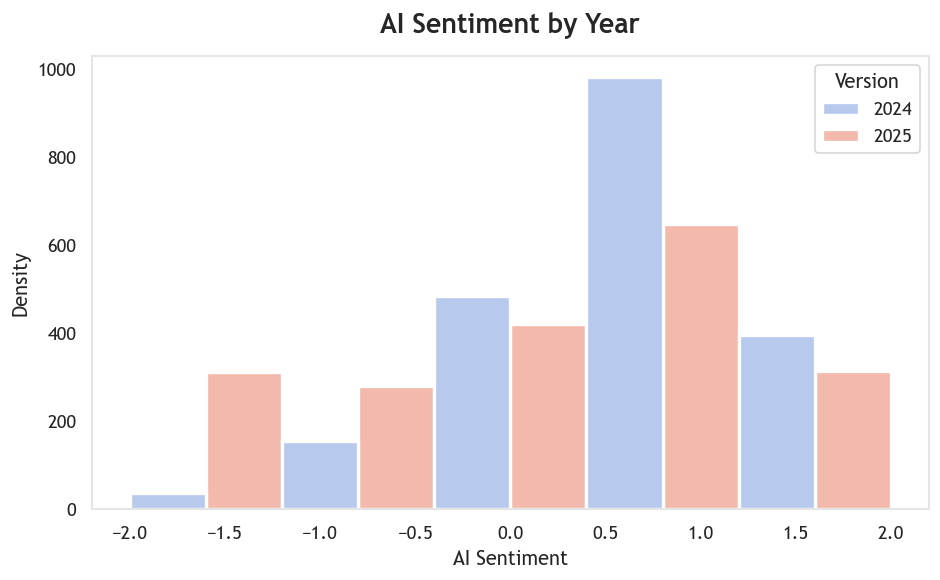

In [353]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Style to mirror Plotly "simple_white" ---
sns.set_theme(style="white", rc={
    "axes.edgecolor": "#E5E5E5",
    "grid.color": "#ffffff",
    "axes.labelsize": 12,
    "axes.titlesize": 16,
    "font.family": "Trebuchet MS"  # will fall back if not installed
})

# Google/Plotly qualitative G10 palette
G10 = [
    "#3366CC","#DC3912","#FF9900","#109618","#990099",
    "#3B3EAC","#0099C6","#DD4477","#66AA00","#B82E2E"
]

fig, ax = plt.subplots(figsize=(8, 5), dpi=120)

sns.histplot(
    data=df_union,
    x="AISent_int",
    hue="Version",
    common_norm=False,
    alpha=0.35,
    linewidth=2,
    palette=G10,
    multiple='dodge',
    bins=5
)

# Labels & title (Plotly-like)
ax.set_title("AI Sentiment by Year", pad=14, fontweight="bold")
ax.set_xlabel("AI Sentiment")
ax.set_ylabel("Density")


plt.tight_layout()
plt.show()


/var/folders/kn/24kjgmss2yzfjngp_zf6x8vr0000gn/T/ipykernel_2640/978025139.py:1: UserWarning:

The palette list has more values (10) than needed (2), which may not be intended.



<Axes: xlabel='AIThreat', ylabel='WorkExp'>

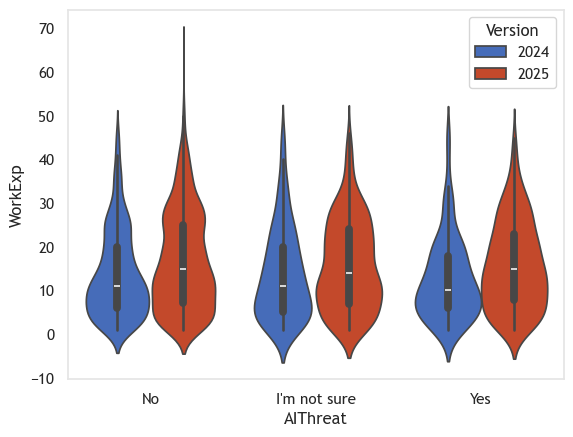

In [354]:
sns.violinplot(data=df_union, x='AIThreat', y='WorkExp', hue='Version', palette=G10)

In [358]:
import plotly.express as px
import plotly.graph_objects as go

px.violin(df_union, y='WorkExp',box=True, points='all')
px.violin(df_union, y='WorkExp',x='AIThreat',color='Version', box=True,points='all')

fig = go.Figure()
fig.add_trace(go.Violin(x=df_union['AIThreat'][df_union['Version'] == 2024],
                        y=df_union['WorkExp'][df_union['Version'] == 2024],
                        legendgroup='2024',scalegroup='2024',name='2024',
                        side='negative', line_color='red'))

fig.add_trace(go.Violin(x=df_union['AIThreat'][df_union['Version'] == 2025],
                        y=df_union['WorkExp'][df_union['Version'] == 2025],
                        legendgroup='2025',scalegroup='2025',name='2025',
                        side='positive', line_color='blue'))



In [367]:
import plotly.graph_objects as go

fig = go.Figure()

# 2024 → left (red)
fig.add_trace(go.Violin(
    x=df_union.loc[df_union["Version"] == 2024, "AIThreat"],
    y=df_union.loc[df_union["Version"] == 2024, "WorkExp"],
    name="2024",
    legendgroup="2024",
    side="negative",              # left side
    line_color="red",
    fillcolor="red",
    opacity=0.45,
    box_visible=True,
    meanline_visible=True,
    points="all",
    pointpos=0,
    jitter=0.25
))

# 2025 → right (blue)
fig.add_trace(go.Violin(
    x=df_union.loc[df_union["Version"] == 2025, "AIThreat"],
    y=df_union.loc[df_union["Version"] == 2025, "WorkExp"],
    name="2025",
    legendgroup="2025",
    side="positive",              # right side
    line_color="blue",
    fillcolor="blue",
    opacity=0.45,
    box_visible=True,
    meanline_visible=True,
    points="all",
    pointpos=0,
    jitter=0.25
))

fig.update_layout(
    template="simple_white",
    title="Work Experience by AI Threat — Split Violin",
    font=dict(family="Rockwell, Arial, sans-serif", size=13),
    violinmode="overlay",         # needed for split view
    paper_bgcolor="white",
    plot_bgcolor="white",
    legend=dict(orientation="h", y=1.1, x=1, xanchor="right", yanchor="bottom", title=""),
    width=1000, height=600,
    margin=dict(t=80, r=30, b=50, l=60)
)

fig.update_xaxes(title="AI Threat", showgrid=True, gridcolor="#e6e6e6")
fig.update_yaxes(title="Work Experience (years)", showgrid=True, gridcolor="#e6e6e6")

fig.show()


In [473]:
import pandas as pd
import plotly.graph_objects as go

# Sentiment order + labels
sent_order = [-2, -1, 0, 1, 2]
sent_labels = {
    -2: "Very\nUnfavorable",
    -1: "Unfavorable",
     0: "Neutral",
     1: "Favorable",
     2: "Very\nFavorable"
}
versions = [2024, 2025]

# Count -> percent within each Version
counts = (
    df_union.groupby(["Version", "AISent_int"]).size()
    .rename("count").reset_index()
)

# Ensure all bins exist for both versions
full = (
    pd.MultiIndex.from_product([versions, sent_order],
                               names=["Version", "AISent_int"]).to_frame(index=False)
    .merge(counts, on=["Version", "AISent_int"], how="left")
    .fillna({"count": 0})
)
full["percent"] = full.groupby("Version")["count"].transform(lambda s: 100 * s / s.sum())
full["label"] = full["AISent_int"].map(sent_labels)

# Build figure with % labels
fig = go.Figure()

for ver, color in [(2024, "#8cacfb"), (2025, "#1f253a")]:
    d = full[full["Version"] == ver]
    fig.add_trace(go.Bar(
        x=d["label"], y=d["percent"], name=str(ver),
        marker_color=color,
        text=d["percent"].round(1).astype(str) + "%",   # ← percent labels
        textposition="outside"
    ))

fig.update_layout(
    template="simple_white",
    title="Stack Overflow Survey: AI Sentiment % by Year",
    font=dict(family="Rockwell, Arial, sans-serif", size=13),
    paper_bgcolor="white", plot_bgcolor="white",
    barmode="group", bargap=0.15,
    legend=dict(orientation="v", y=1, x=1, xanchor="right", yanchor="top"),
    width=1000, height=600,
    margin=dict(t=90, r=150, b=50, l=60)
)

fig.update_xaxes(title="AI Sentiment")
fig.update_yaxes(title="Percentage %", ticksuffix="%", range=[0, 60],
                 showgrid=True, gridcolor="#e6e6e6")

fig.show()


In [365]:
df24['AISent_int'].value_counts()

AISent_int
 1.0    979
 0.0    483
 2.0    393
-1.0    153
-2.0     35
Name: count, dtype: int64

In [474]:
import plotly.graph_objects as go
import pandas as pd

# Map threat values for nicer axis labels
threat_map = {
    -1: "No",
     0: "I'm not sure",
     1: "Yes"
}

# Calculate percentages
counts = (
    df_union.groupby(["Version", "AIThreat_int"])
    .size()
    .reset_index(name="count")
)

# Normalize within each Version (each sums to 100%)
counts["percent"] = counts.groupby("Version")["count"].transform(lambda x: 100 * x / x.sum())
counts["AIThreat_label"] = counts["AIThreat_int"].map(threat_map)

# --- Build figure with Bar (instead of Histogram) ---
fig = go.Figure()

for version, color in [(2024, "#8cacfb"), (2025, "#1f253a")]:
    df_ver = counts[counts["Version"] == version]
    fig.add_trace(go.Bar(
        x=df_ver["AIThreat_label"],
        y=df_ver["percent"],
        name=str(version),
        marker_color=color,
        text=df_ver["percent"].round(1).astype(str) + "%",  # ✅ labels
        textposition="outside"
    ))

# --- Layout polish ---
fig.update_layout(
    template="simple_white",
    title="Stack Overflow Survey: AI Threat % By Year",
    font=dict(family="Rockwell, Arial, sans-serif", size=13),
    paper_bgcolor="white",
    plot_bgcolor="white",
    barmode="group",   # side-by-side
    bargap=0.15,
    legend=dict(
        orientation="v", y=1, x=1, xanchor="right", yanchor="top",
        bgcolor="rgba(0,0,0,0)"
    ),
    width=1000, height=600,
    margin=dict(t=90, r=150, b=50, l=60)
)

fig.update_xaxes(title="AI Threat")
fig.update_yaxes(title="Percent %", range=[0, 100], ticksuffix="%")

fig.show()


In [387]:
df_union['AIThreat_int'].value_counts()

AIThreat_int
-1.0    2776
 0.0     718
 1.0     496
Name: count, dtype: int64

In [482]:
import plotly.graph_objects as go


industry_cols = [
    'Software Development',
    'Fintech',
    'Banking/Financial Services',
    'Internet, Telecomm or Information Services',
    'Media & Advertising Services',
    'Insurance',
]

import matplotlib.pyplot as plt
import seaborn as sns

for i in industry_cols:
    df_vplot = df_union[df_union['Industry'] == i]
    fig = go.Figure()

    # Define sentiment categories for nice axis labels
    sentiment_map = {
        -2: "Very\nUnfavorable",
        -1: "Unfavorable",
         0: "Neutral",
         1: "Favorable",
         2: "Very\nFavorable"
    }

    # Calculate percentage distribution per Version
    counts = (
        df_vplot.groupby(["Version", "AISent_int"])
        .size()
        .reset_index(name="count")
    )

    # Normalise within each Version (so each sums to 100%)
    counts["percent"] = counts.groupby("Version")["count"].transform(lambda x: 100 * x / x.sum())

    # Replace x-axis integers with sentiment labels
    counts["AISent_label"] = counts["AISent_int"].map(sentiment_map)

    # --- Build the chart ---
    fig = go.Figure()

    for version, color in [(2024, "#8cacfb"), (2025, "#1f253a")]:
        df_ver = counts[counts["Version"] == version]
        fig.add_trace(go.Bar(
            x=df_ver["AISent_label"],
            y=df_ver["percent"],
            name=str(version),
            marker_color=color,
            text=df_ver["percent"].round(1).astype(str) + "%",
            textposition="outside"  # ✅ labels above bars
        ))

    fig.update_layout(
        template="simple_white",
        title=f"{i}: AI Sentiment % Distribution by Year",
        font=dict(family="Rockwell, Arial, sans-serif", size=13),
        paper_bgcolor="white",
        plot_bgcolor="white",
        barmode="group",             # side-by-side bars
        bargap=0.15,
        legend=dict(
            orientation="v", y=1, x=1, xanchor="right", yanchor="top",
            bgcolor="rgba(0,0,0,0)"
        ),
        width=1000, height=600,
        margin=dict(t=90, r=150, b=50, l=60)
    )

    fig.update_xaxes(title="AI Sentiment")
    fig.update_yaxes(title="Percentage %", ticksuffix="%", range=[0, 100])
    fig.update_yaxes(
        title="Percentage %",
        ticksuffix="%",
        range=[0, 65],   # ✅ max 60%
        showgrid=True, gridcolor="#e6e6e6"
    )

    fig.show()



In [419]:
df_union.head(2)

,ResponseId,MainBranch,Age,EdLevel,Employment,WorkExp,YearsCode,DevType,OrgSize,ICorPM,Industry,Country,ConvertedCompYearly,JobSat,Version,AISent,AISent_int,AISelect,AIThreat,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,AISelect_mapped,AIThreat_mapped,AIThreat_int
0,26,I am a developer by profession,55-64 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",37.0,41.0,"Developer, full-stack",NaN,NaN,Software Development,United Kingdom of Great Britain and Northern I...,108913.0,8.0,2025,Favorable,1.0,"Yes, I use AI tools daily",No,2.0,10.0,11.0,4.0,12.0,13.0,6.0,3.0,5.0,Yes,-1.0,-1.0
1,39,I am a developer by profession,45-54 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,25.0,25.0,"Developer, full-stack",Less than 20 employees,Individual contributor,Software Development,United Kingdom of Great Britain and Northern I...,91215.0,6.0,2025,Favorable,1.0,"Yes, I use AI tools daily",No,7.0,10.0,11.0,12.0,13.0,5.0,8.0,6.0,1.0,Yes,-1.0,-1.0


/Users/guywinfield/PycharmProjects/.turing_venv/lib/python3.13/site-packages/seaborn/distributions.py:1176: UserWarning:

The following kwargs were not used by contour: 'linewidth'



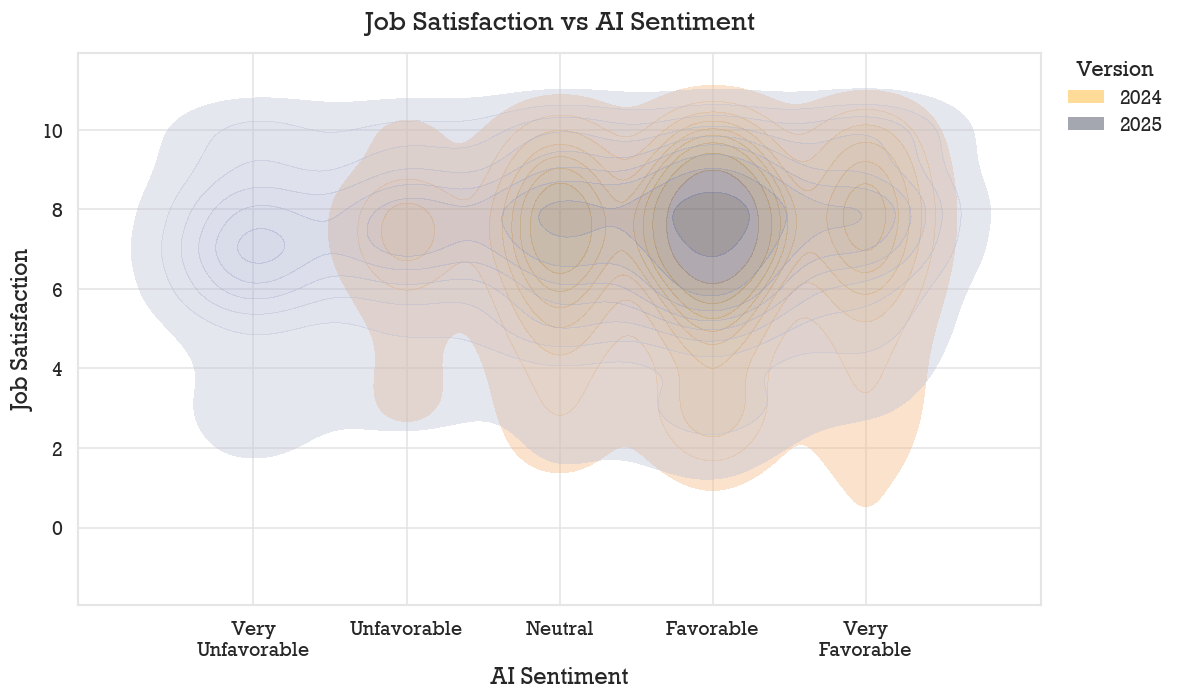

In [468]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # for manual legend patches

sns.set_theme(style="whitegrid", rc={
    "axes.edgecolor": "#E5E5E5",
    "grid.color": "#E5E5E5",
    "font.family": "Rockwell",
    "axes.labelsize": 13,
    "axes.titlesize": 15
})

palette = {2024: "#FFA500", 2025: "#1f253a"}

fig, ax = plt.subplots(figsize=(10, 6), dpi=120)

sns.kdeplot(
    data=df_union,
    x="AISent_int", y="JobSat",
    hue="Version",
    hue_order=[2024, 2025],
    fill=True,
    alpha=0.4,
    linewidth=2,
    palette=palette,
    legend=True,              # explicitly request legend
    ax=ax
)

ax.set_title("Job Satisfaction vs AI Sentiment", pad=14, fontweight="bold")
ax.set_xlabel("AI Sentiment")
ax.set_ylabel("Job Satisfaction")
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xticklabels(["Very\nUnfavorable", "Unfavorable", "Neutral", "Favorable", "Very\nFavorable"])

# Try to use seaborn's handles first; if none, build a manual legend
handles, labels = ax.get_legend_handles_labels()
if handles:
    ax.legend(title="Version", loc="upper left", bbox_to_anchor=(1.02, 1),
              frameon=False, borderaxespad=0)
else:
    patches = [
        mpatches.Patch(facecolor=palette[v], alpha=0.4, edgecolor="none", label=str(v))
        for v in [2024, 2025]
    ]
    ax.legend(handles=patches, title="Version", loc="upper left",
              bbox_to_anchor=(1.02, 1), frameon=False, borderaxespad=0)

plt.tight_layout()
plt.show()


<Axes: xlabel='AISent_int', ylabel='JobSat'>

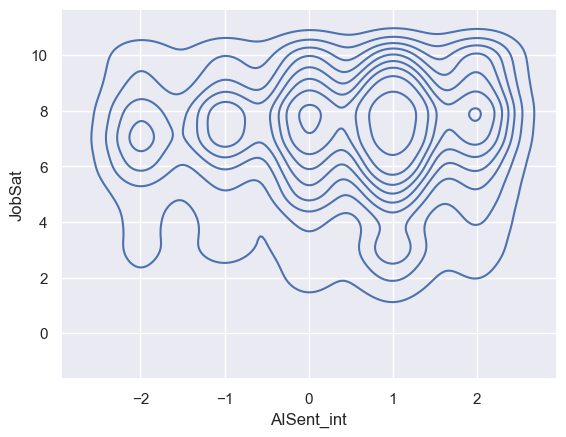

In [420]:
sns.kdeplot(data=df_union, x='AISent_int',y='JobSat')

<Axes: xlabel='AISent_int', ylabel='JobSat'>

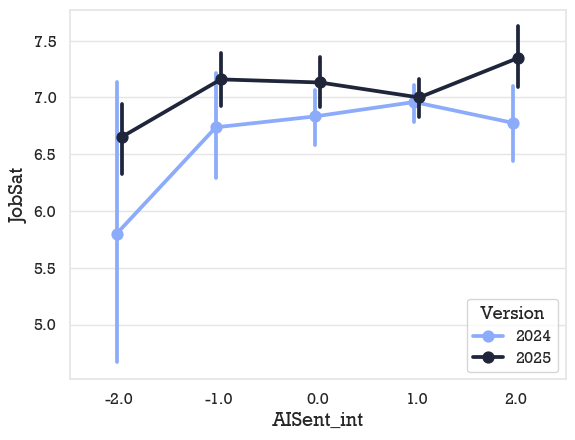

In [429]:
sns.pointplot(
    data=df_union,
    x="AISent_int", y="JobSat",
    hue="Version",
    palette={2024: "#8cacfb", 2025: "#1f253a"},
    dodge=True, errorbar="ci"
)


/var/folders/kn/24kjgmss2yzfjngp_zf6x8vr0000gn/T/ipykernel_2640/2499864493.py:43: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



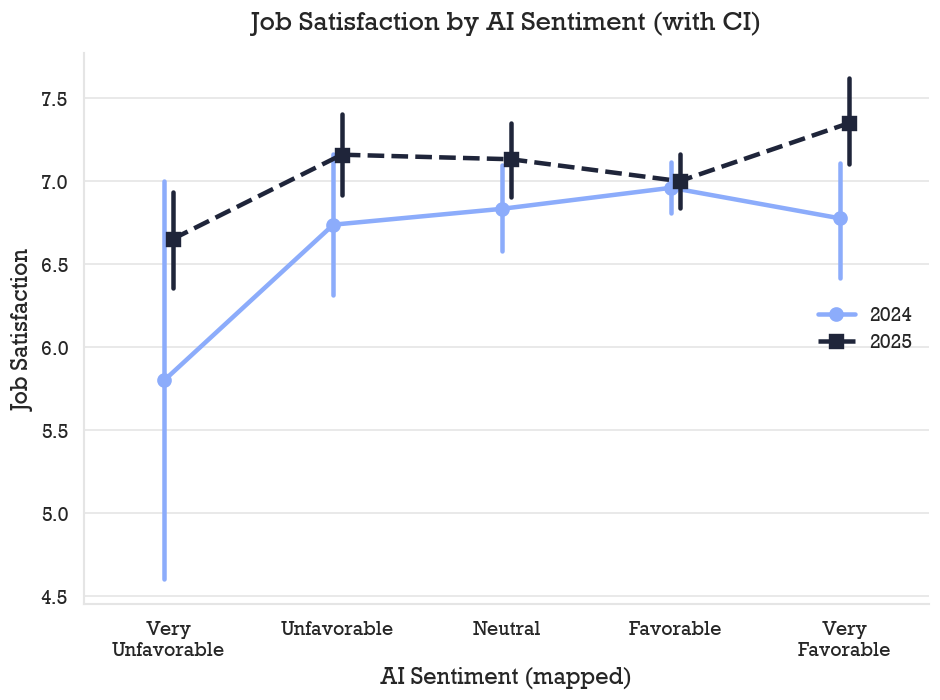

In [457]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Force an ordered categorical for AISent_int
sent_order = [-2, -1, 0, 1, 2]
label_map  = {
    -2: "Very\nUnfavorable",
    -1: "Unfavorable",
     0: "Neutral",
     1: "Favorable",
     2: "Very\nFavorable"
}
dfu = df_union.copy()
dfu["AISent_int"] = pd.Categorical(dfu["AISent_int"], categories=sent_order, ordered=True)

# 2) Plot with explicit order + hue order (to prevent dodged offsets drifting)
palette = {2024: "#8cacfb", 2025: "#1f253a"}

sns.set_theme(style="whitegrid", rc={
    "axes.edgecolor": "#E5E5E5", "grid.color": "#E5E5E5",
    "font.family": "Rockwell", "axes.labelsize": 13, "axes.titlesize": 15
})

plt.figure(figsize=(8, 6), dpi=120)
ax = sns.pointplot(
    data=dfu,
    x="AISent_int", y="JobSat",
    hue="Version",
    order=sent_order,                 # <- critical
    hue_order=[2024, 2025],           # <- critical
    palette=palette,
    dodge=True,
    errorbar="ci",
    markers=["o", "s"], linestyles=["-", "--"]
)

# 3) Labels, legend, tidy
ax.set_title("Job Satisfaction by AI Sentiment (with CI)", pad=14, fontweight="bold")
ax.set_xlabel("AI Sentiment")
ax.set_ylabel("Job Satisfaction")

ax.set_xticklabels([label_map[v] for v in sent_order])
ax.legend(title="", loc="center right", frameon=False)

ax.set_facecolor("white")       # plot area background
ax.figure.set_facecolor("white")

sns.despine()
plt.tight_layout()
plt.show()


In [439]:
df_union.groupby(['Version', 'AISent_int']).size().reset_index(name='count')


,Version,AISent_int,count
0,2024,-2.0,35
1,2024,-1.0,153
2,2024,0.0,483
3,2024,1.0,979
4,2024,2.0,393
5,2025,-2.0,309
6,2025,-1.0,279
7,2025,0.0,419
8,2025,1.0,646
9,2025,2.0,313


In [481]:
df_union.groupby(['Version', 'Industry']).size().reset_index()

,Version,Industry,0
0,2024,Banking/Financial Services,107
1,2024,Computer Systems Design and Services,49
2,2024,Energy,50
3,2024,Fintech,129
4,2024,Government,57
5,2024,Healthcare,71
6,2024,Higher Education,54
7,2024,Insurance,16
8,2024,"Internet, Telecomm or Information Services",106
9,2024,Manufacturing,52


In [ ]:
'